In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from textwrap import wrap

# Set default fontsize and colors for graphs
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'

# Disable scrolling for long output
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

<IPython.core.display.Javascript object>

In [2]:
train_data = pd.read_csv("bangalore-cas-alerts.csv")
df = pd.read_csv("bangalore-cas-alerts.csv")

In [3]:
train_data.shape

(207617, 7)

In [4]:
df.dropna(inplace=True)

In [5]:
train_data.drop_duplicates(inplace=True)
train_data.shape

(152276, 7)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152276 entries, 0 to 207616
Data columns (total 7 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   deviceCode_deviceCode               152276 non-null  int64  
 1   deviceCode_location_latitude        152276 non-null  float64
 2   deviceCode_location_longitude       152276 non-null  float64
 3   deviceCode_location_wardName        152276 non-null  object 
 4   deviceCode_pyld_alarmType           152276 non-null  object 
 5   deviceCode_pyld_speed               152276 non-null  int64  
 6   deviceCode_time_recordedTime_$date  152276 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 9.3+ MB


In [7]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
deviceCode_deviceCode,152276.0,8.641311e+14,2.963658e+11,8.620100e+14,8.639770e+14,8.639770e+14,8.645040e+14,8.645040e+14
deviceCode_location_latitude,152276.0,1.297075e+01,2.663822e-02,1.268666e+01,1.295651e+01,1.297310e+01,1.298773e+01,1.307008e+01
deviceCode_location_longitude,152276.0,7.772170e+01,2.972414e-02,7.750818e+01,7.770688e+01,7.772740e+01,7.774370e+01,7.780682e+01
deviceCode_pyld_speed,152276.0,2.214478e+01,1.371225e+01,0.000000e+00,1.100000e+01,2.200000e+01,3.200000e+01,8.300000e+01


In [8]:
columns={
            "deviceCode_deviceCode" : "deviceCode",
            "deviceCode_location_latitude" : "latitude",
            "deviceCode_location_longitude" : "longitude",
            "deviceCode_location_wardName" : "wardName",
            "deviceCode_pyld_alarmType" : "alarmType",
            "deviceCode_pyld_speed" : "speed",
            "deviceCode_time_recordedTime_$date" : "recordedDateTime"
        }

train_data.rename(columns=columns, inplace=True)
print("Updated column names of train dataframe:", train_data.columns)

Updated column names of train dataframe: Index(['deviceCode', 'latitude', 'longitude', 'wardName', 'alarmType', 'speed',
       'recordedDateTime'],
      dtype='object')


In [9]:
df =df.rename(columns = {'deviceCode_deviceCode':'DeviceCode',
        'deviceCode_location_latitude':'Latitude',
        'deviceCode_location_longitude' : 'Longitude',
        'deviceCode_location_wardName':'WardName',
        'deviceCode_pyld_alarmType':'AlarmType',
        'deviceCode_pyld_speed':'Speed',
        'deviceCode_time_recordedTime_$date':'RecordedDateTime'})

In [10]:
lat_max = train_data.latitude.max()
lat_min = train_data.latitude.min()
print("Range of latitude:", lat_max, lat_min)

lon_max = train_data.longitude.max()
lon_min = train_data.longitude.min()
print("Range of longitude:", lon_max, lon_min)

Range of latitude: 13.070075035095217 12.686662673950195
Range of longitude: 77.80682373046875 77.5081787109375


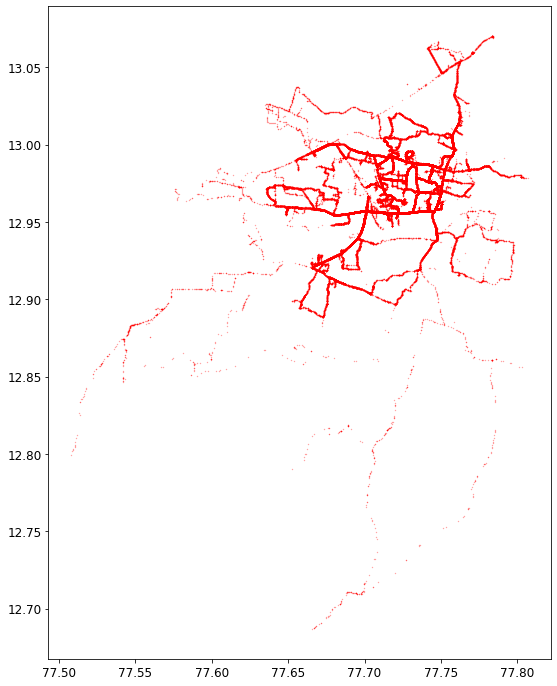

In [11]:
fig, axes = plt.subplots(figsize=(9,12))
axes.scatter(train_data.longitude, train_data.latitude, s=0.1, alpha=0.5, c='r')
plt.show()

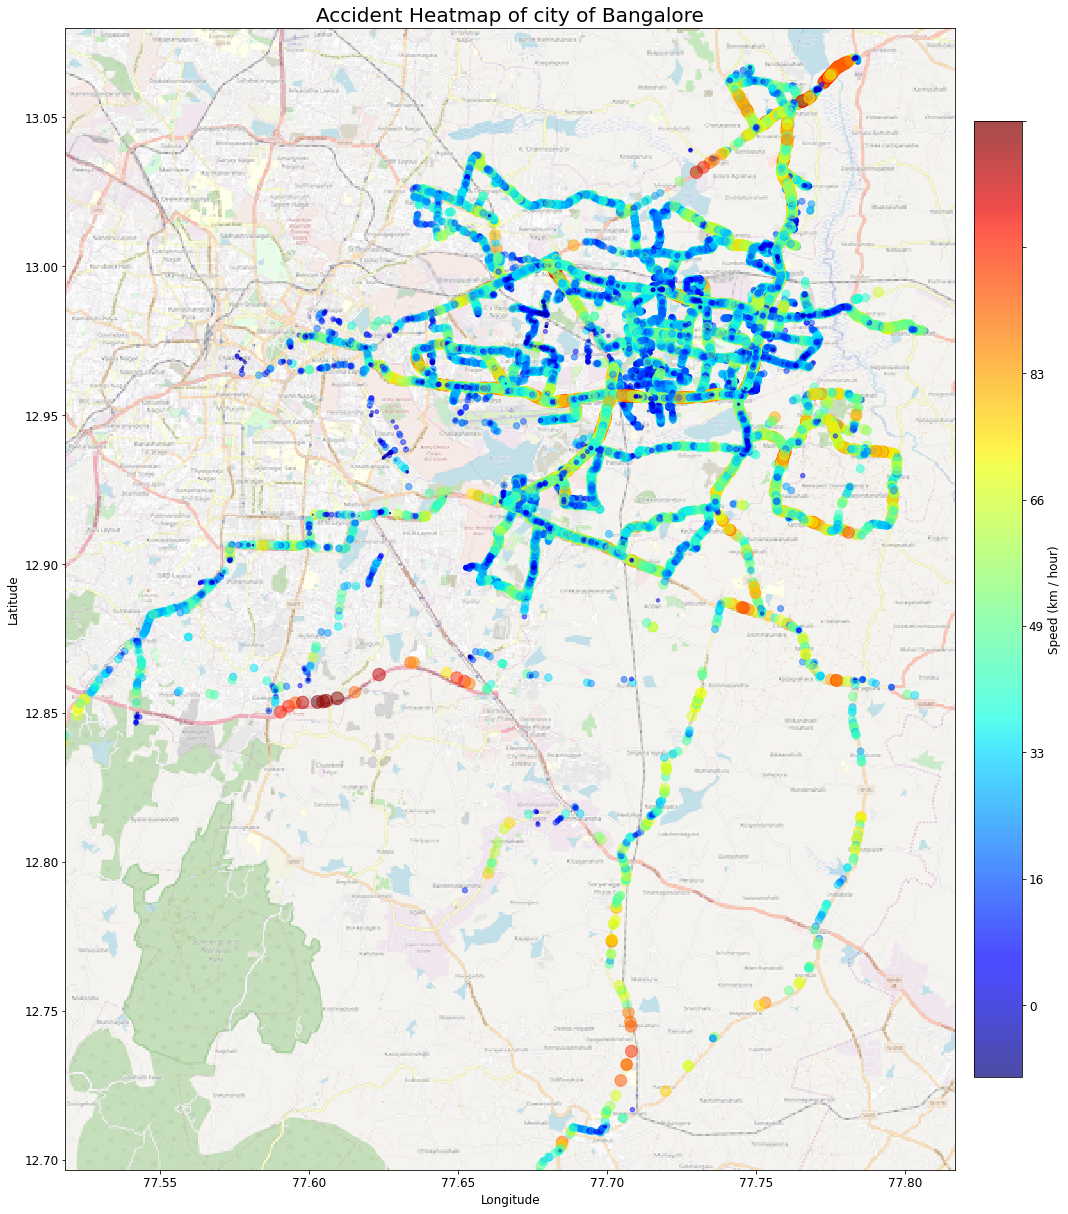

In [12]:
bangalore_map_img = 'https://lh3.googleusercontent.com/np8igtYRrHpe7rvJwMzVhbyUZC4Npgx5fRznofRoLVhP6zcdBW9tfD5bC4FbF2ITctElCtBrOn7VH_qEBZMVoPrTFipBdodufT0QU1NeeQVyokMAKtvSHS9BfYMswXodz_IrkiZStg=w500-h664-no'
bangalore_map = plt.imread(bangalore_map_img)
cmap = plt.get_cmap("jet")

axes = train_data.plot(figsize=(15,20), kind='scatter', 
                    x='longitude', y='latitude', 
                    alpha=0.5, marker="o", s=train_data["speed"]*2,
                    c=train_data["speed"], cmap=cmap,
                    colorbar=False)

epsilon = 0.01
bound_box = [lon_min + epsilon, lon_max + epsilon, 
             lat_min + epsilon, lat_max + epsilon]
im = plt.imshow(bangalore_map, extent=bound_box, zorder=0, 
           cmap=cmap, interpolation='nearest', alpha=0.7)

axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")
axes.set_title('Accident Heatmap of city of Bangalore')

# Colorbar
speed = train_data["speed"].values
tick_values = np.linspace(speed.min(), speed.max(), num=6, dtype=np.int64)

cbar = plt.colorbar(im, fraction=0.05, pad=0.02)
cbar.set_label("Speed (km / hour)")
cbar.ax.set_yticklabels(["%d"%(val) for val in tick_values])

plt.tight_layout()

#output_image = os.path.join(input_data_dir, "output_bangalore_map_traffic")
#plt.savefig(output_image + ".png", format='png', dpi=300)

plt.show()

In [13]:
unique_data = train_data['deviceCode'].unique()
print("Number of unique devices used in buses =", len(unique_data))

Number of unique devices used in buses = 26


In [14]:
train_data['wardName'] = train_data['wardName'].str.capitalize()
print("Total number of wards in CDS dataset:", len(train_data['wardName'].unique()))

Total number of wards in CDS dataset: 49


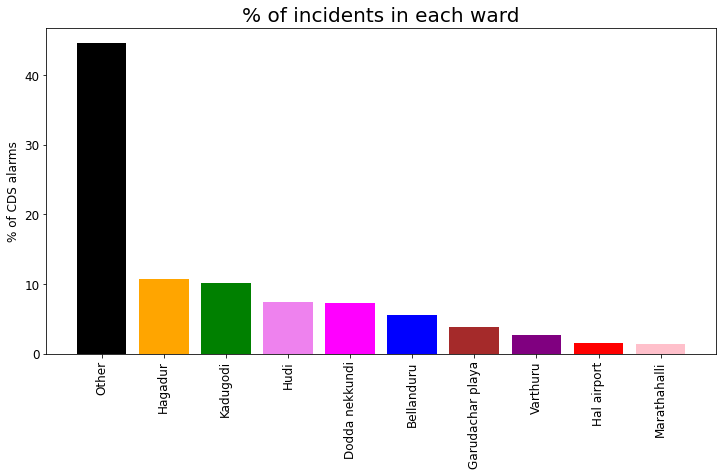

In [15]:
fig, axes = plt.subplots(figsize=(12,6))
data = train_data['wardName'].value_counts(normalize=True).sort_values(ascending=False)
data = data.head(10)
axes.bar(data.index, data*100, color={"red","blue","green","orange","brown","black","pink","purple","violet","magenta"})
axes.set_ylabel("% of CDS alarms")
axes.set_xticklabels(data.index, rotation=90)
axes.set_title("% of incidents in each ward")
plt.show()

In [16]:
Xtrain = df[['Latitude','Longitude']][df.WardName != 'Other']
ytrain = df.WardName[df.WardName != 'Other']
Xtest = df[['Latitude','Longitude']][df.WardName == 'Other']
ytest = df.WardName[df.WardName == 'Other']
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1,weights='distance')
knn.fit(Xtrain,ytrain)
ypred = knn.predict(Xtest)

In [17]:
df.WardName.value_counts().head()

other             112048
Kadugodi           17321
Hagadur            16623
Hudi               13076
Dodda Nekkundi     11361
Name: WardName, dtype: int64

In [18]:
bbmp_data = pd.read_csv("bbmp-wards.csv")

In [19]:
bbmp_data.sample(5)

,latitude,longitude,altitude,geometry,coordinates,OBJECTID,ASS_CONST_,ASS_CONST1,WARD_NO,WARD_NAME,POP_M,POP_F,POP_SC,POP_ST,POP_TOTAL,AREA_SQ_KM,LAT,LON,RESERVATIO
75,NaN,NaN,NaN,MultiPolygon,"77.66299838408524,13.005749728932134,77.663126...",76,161,C.V. Ramannagar (SC),50,Benniganahalli,17006,14979,7346,947,31985,4.92,12.999502,77.651704,Scheduled Caste
10,NaN,NaN,NaN,MultiPolygon,"77.5692496483965,13.054622565408488,77.5688687...",11,152,Byatarayanapura,10,Dodda Bommasandra,11327,10313,3188,286,21640,4.20,13.056595,77.558692,General
41,NaN,NaN,NaN,MultiPolygon,"77.54671683242991,13.012628728886394,77.546586...",42,156,Mahalakshmi Layout,68,Mahalakshimpuram,19202,16774,1258,311,35976,0.95,13.007350,77.540043,Backward Category - B
84,NaN,NaN,NaN,MultiPolygon,"77.61826631184702,12.987757213751607,77.618376...",85,162,Shivaji Nagar,90,Halsoor,20526,15365,6474,866,35891,1.68,12.979704,77.619822,Scheduled Caste
68,NaN,NaN,NaN,MultiPolygon,"77.66229265601537,13.012388983850666,77.662276...",69,160,Sarvagna Nagar,27,Banasavadi,16634,15364,3419,263,31998,3.46,13.014699,77.648927,General


In [20]:
bbmp_data['WARD_NAME'] = bbmp_data['WARD_NAME'].str.capitalize()
print("Total number of wards in BBMP dataset:", len(bbmp_data['WARD_NAME'].unique()))

# Create a dict mapping of ward number and names
ward_numbers = bbmp_data['WARD_NO'].unique()
ward_names = bbmp_data['WARD_NAME'].unique()
ward_dict = dict(zip(ward_numbers, ward_names))

Total number of wards in BBMP dataset: 198


In [21]:
# Apply KNN classification
# Input: Lat, Lon, Output: Ward No (since this is numeric variable)
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=1, weights='distance')
knn_clf.fit(bbmp_data[['LAT', 'LON']], bbmp_data['WARD_NO'])

# Estimate ward no in train_data from learnt model of bbmp_data
train_data['estimatedWardNo'] = knn_clf.predict(train_data[['latitude', 'longitude']])
# Estimate ward name in train_data from the ward no - ward name mapping dictionary
train_data['estimatedWardName'] = train_data['estimatedWardNo'].map(ward_dict)

In [22]:
# Check accuracy
validation_orig = train_data['wardName'][~train_data['wardName'].str.contains('Other')]
validation_estimated = train_data['estimatedWardName'][~train_data['wardName'].str.contains('Other')]
accuracy = np.mean(validation_orig == validation_estimated)
print("Out of ward names which are not 'Other', % of accurate predictions =", accuracy*100)

Out of ward names which are not 'Other', % of accurate predictions = 62.588597842835135


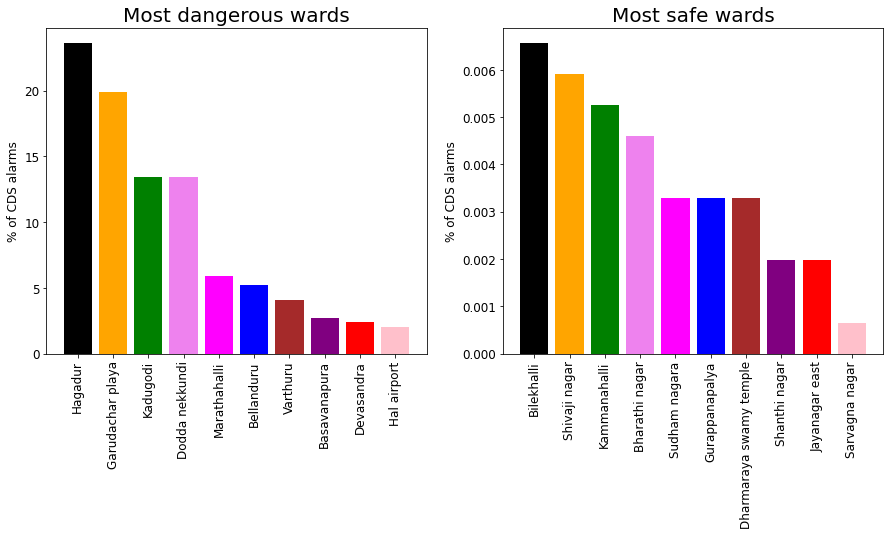

In [23]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))
data = train_data['estimatedWardName'].value_counts(normalize=True).sort_values(ascending=False)
data1 = data.head(10)

axes1.bar(data1.index, data1*100, color={"red","blue","green","orange","brown","black","pink","purple","violet","magenta"})
axes1.set_ylabel("% of CDS alarms")
axes1.set_xticklabels(data1.index, rotation=90)
axes1.set_title("Most dangerous wards")

data2 = data.tail(10)
axes2.bar(data2.index, data2*100, color={"red","blue","green","orange","brown","black","pink","purple","violet","magenta"})
axes2.set_ylabel("% of CDS alarms")
axes2.set_xticklabels(data2.index, rotation=90)
axes2.set_title("Most safe wards")

plt.show()

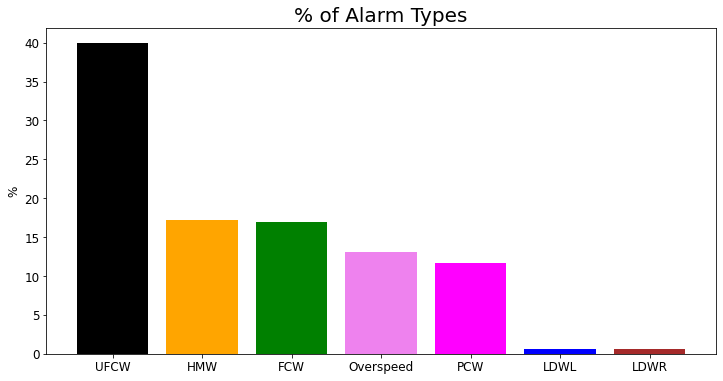

In [24]:
fig, axes = plt.subplots(figsize=(12,6))
data = train_data['alarmType'].value_counts(normalize=True)
axes.bar(data.index, data*100, color={"red","blue","green","orange","brown","black","pink","purple","violet","magenta"})
axes.set_title('% of Alarm Types')
axes.set_xlabel('')
axes.set_ylabel('%')
plt.show()

In [25]:
alarm_mapping = {"UFCW":"LSCW", "HMW":"HSCW", "FCW":"HSCW", "LDWL":"LDW", "LDWR":"LDW", "Overspeed":"Overspeed", "PCW":"PCW"}
train_data['alarmTypeCat'] = train_data['alarmType'].map(alarm_mapping)

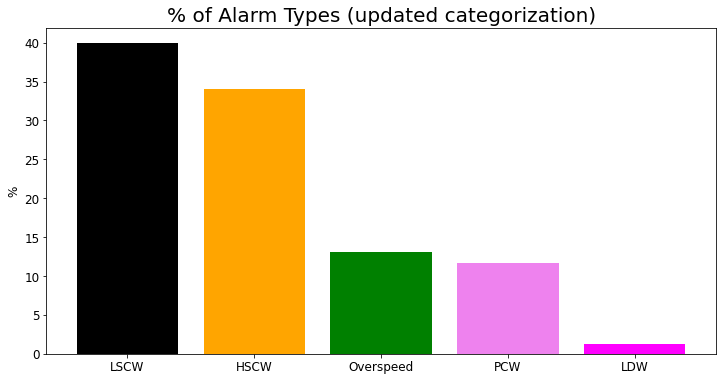

In [26]:
fig, axes = plt.subplots(figsize=(12,6))
data = train_data['alarmTypeCat'].value_counts(normalize=True)
axes.bar(data.index, data*100, color={"red","blue","green","orange","brown","black","pink","purple","violet","magenta"})
axes.set_title('% of Alarm Types (updated categorization)')
axes.set_xlabel('')
axes.set_ylabel('%')
plt.show()

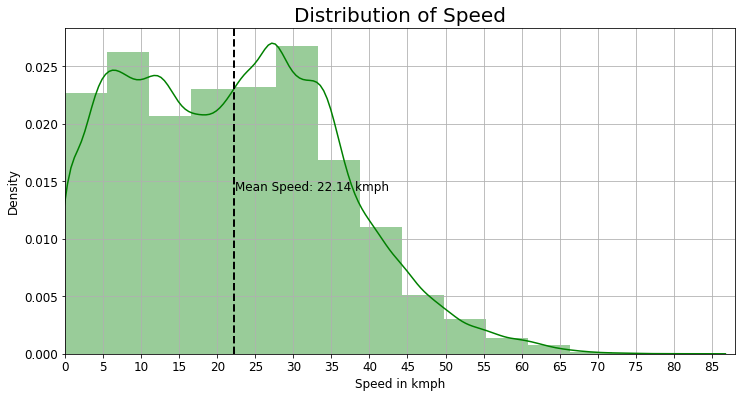

In [27]:
fig, axes = plt.subplots(figsize=(12,6))
data = train_data['speed']
#axes.hist(data, bins=15, color='green')
sns.distplot(data, bins=15, color='green')
axes.axvline(data.mean(), color='k', linestyle='dashed', linewidth=2)

axes.set_xticks(np.arange(0, data.max()+5, 5))
axes.set_xticklabels([str(val) for val in np.arange(0, data.max()+5, 5)])
axes.set_xlim(0, data.max()+5)
axes.set_xlabel('Speed in kmph')
axes.set_title('Distribution of Speed')
axes.grid(True)

_ymin, _ymax = axes.get_ylim()
axes.text(data.mean() + data.mean()/100,
          (_ymax+_ymin)*0.5,
          'Mean Speed: {:.2f} kmph'.format(data.mean()))

plt.show()

In [28]:
train_data.recordedDateTime = train_data.recordedDateTime.map(lambda x : pd.Timestamp(x, tz='Asia/Kolkata'))

In [29]:
data_lscw = train_data[train_data.alarmTypeCat == 'LSCW']
data_hscw = train_data[train_data.alarmTypeCat == 'HSCW']
data_speed = train_data[train_data.alarmTypeCat == 'Overspeed']
data_pcw = train_data[train_data.alarmTypeCat.str.contains('PCW', 'LDW')]

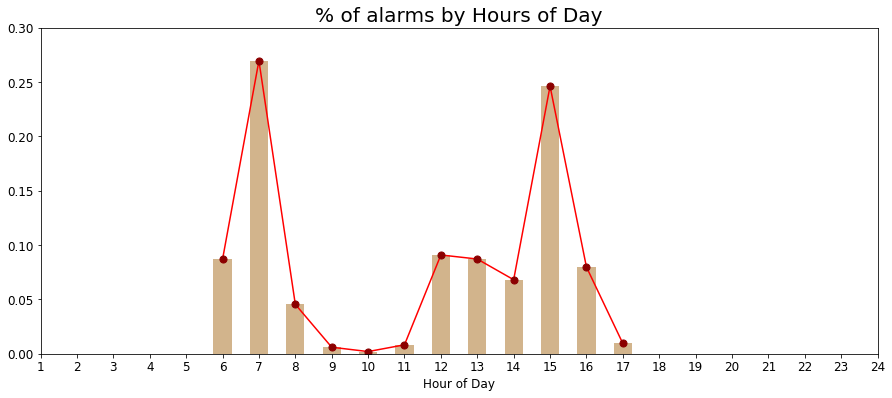

In [30]:
fig, axes = plt.subplots(figsize=(15,6))
train_data["hour"] = train_data.recordedDateTime.dt.hour
data = train_data["hour"].value_counts(normalize=True).sort_index()

axes.bar(data.index, data, color='tan', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Hour of Day')
axes.set_xticks(np.arange(1, 25))
axes.set_xticklabels([str(val) for val in np.arange(1, 25)])
axes.set_ylim(0, 0.3)
axes.set_title('% of alarms by Hours of Day')

plt.show()

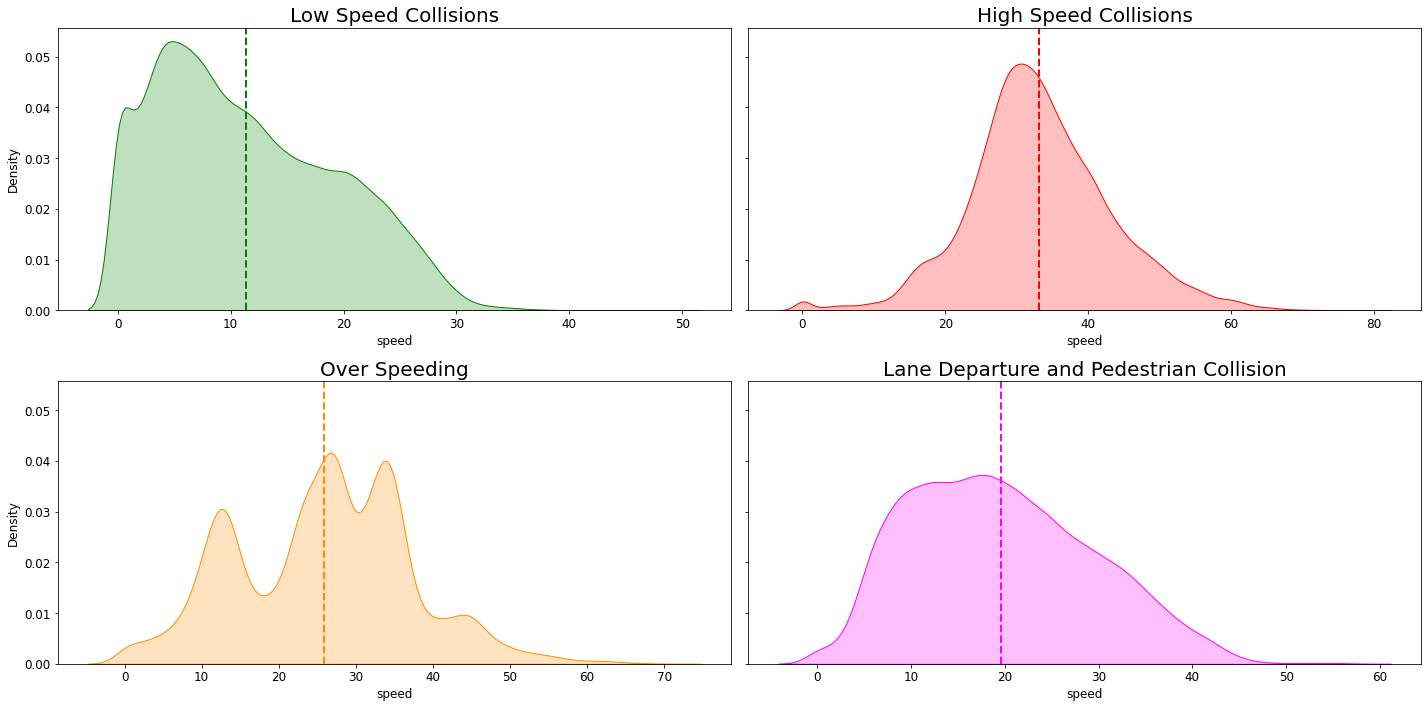

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(20,10), sharey=True)

# LSCW
sns.kdeplot(data_lscw.speed, color='green', shade=True, ax=axes[0][0])
axes[0][0].axvline(data_lscw.speed.mean(), color='green', linestyle='dashed', linewidth=2)
axes[0][0].set_title('Low Speed Collisions')

# LSCW
sns.kdeplot(data_hscw.speed, color='red', shade=True, ax=axes[0][1])
axes[0][1].axvline(data_hscw.speed.mean(), color='red', linestyle='dashed', linewidth=2)
axes[0][1].set_title('High Speed Collisions')

# LSCW
sns.kdeplot(data_speed.speed, color='darkorange', shade=True, ax=axes[1][0])
axes[1][0].axvline(data_speed.speed.mean(), color='darkorange', linestyle='dashed', linewidth=2)
axes[1][0].set_title('Over Speeding')

# LSCW
sns.kdeplot(data_pcw.speed, color='magenta', shade=True, ax=axes[1][1])
axes[1][1].axvline(data_pcw.speed.mean(), color='magenta', linestyle='dashed', linewidth=2)
axes[1][1].set_title('Lane Departure and Pedestrian Collision')

plt.tight_layout()
plt.show()

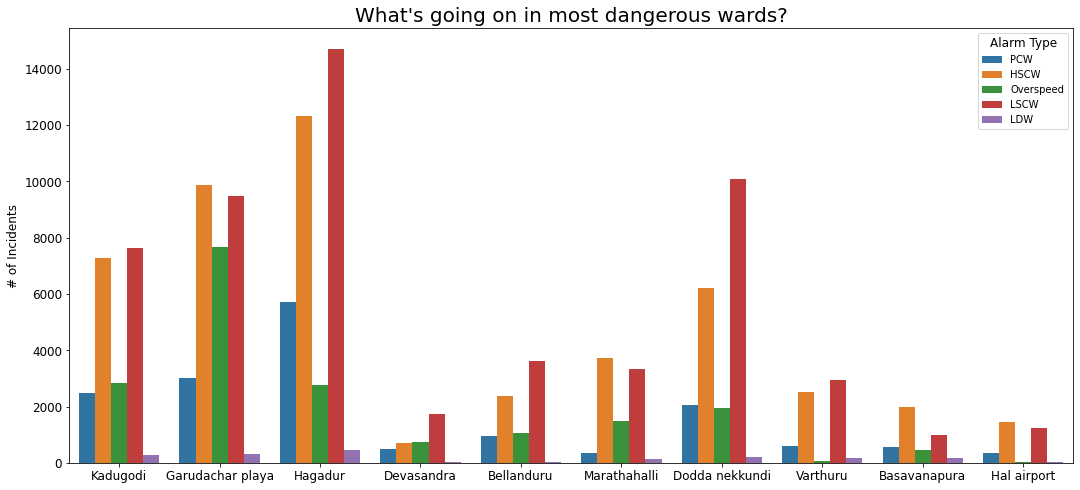

In [32]:
fig, axes = plt.subplots(figsize=(18,8))
data = train_data['estimatedWardName'].value_counts(normalize=True).sort_values(ascending=False)
data = data.head(10)
ward_top = data.index

ward_top_data = train_data[train_data.estimatedWardName.isin(ward_top)]
sns.countplot(x='estimatedWardName', hue='alarmTypeCat', data=ward_top_data, ax=axes)

axes.legend(title='Alarm Type')
axes.set_xlabel('')
axes.set_ylabel('# of Incidents')
axes.set_title('What\'s going on in most dangerous wards?')

plt.show()

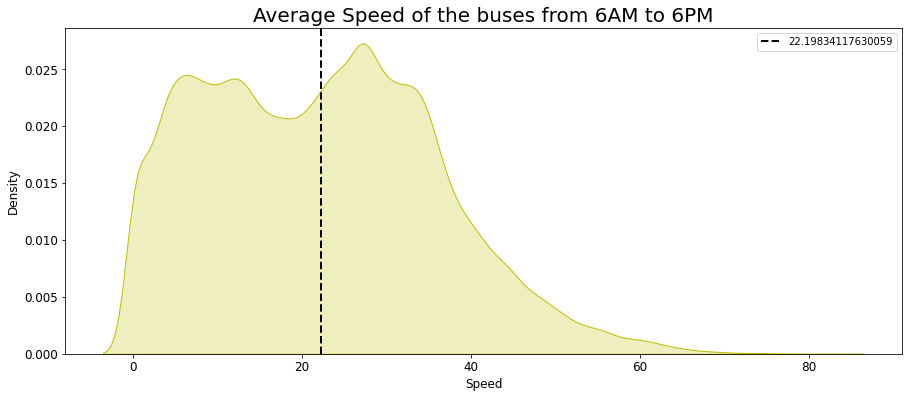

In [33]:
plt.figure(figsize=[15,6])
sns.kdeplot(df.Speed,shade=True,color='y')
plt.axvline(df.Speed.mean(),linestyle='dashed',linewidth='2',color='k',label=df.Speed.mean())
plt.legend(loc='best')
plt.title('Average Speed of the buses from 6AM to 6PM')
plt.show()

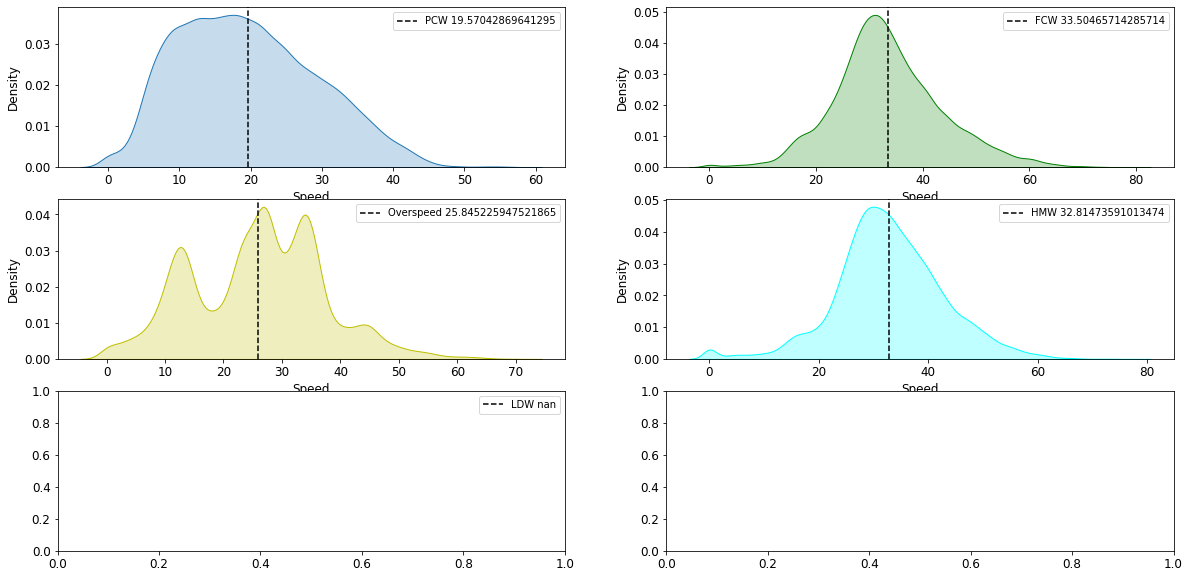

In [34]:
fig, axes = plt.subplots(3, 2, figsize=(20,10))


sns.kdeplot(df.Speed[df.AlarmType=='PCW'],shade=True,ax=axes[0][0])
axes[0][0].axvline(df.Speed[df.AlarmType=='PCW'].mean(),linestyle='dashed',color='k',label='PCW '+str(df.Speed[df.AlarmType=='PCW'].mean()))
axes[0][0].legend(loc='best')



sns.kdeplot(df.Speed[df.AlarmType=='FCW'],color='g',shade=True,ax=axes[0][1])
axes[0][1].axvline(df.Speed[df.AlarmType=='FCW'].mean(),linestyle='dashed',color='k',label='FCW '+str(df.Speed[df.AlarmType=='FCW'].mean()))
axes[0][1].legend(loc='best')



sns.kdeplot(df.Speed[df.AlarmType=='Overspeed'],color='y',shade=True,ax=axes[1][0])
axes[1][0].axvline(df.Speed[df.AlarmType=='Overspeed'].mean(),linestyle='dashed',color='k',label='Overspeed '+str(df.Speed[df.AlarmType=='Overspeed'].mean()))
axes[1][0].legend(loc='best')


sns.kdeplot(df.Speed[df.AlarmType=='HMW'],color='cyan',shade=True,ax=axes[1][1])
axes[1][1].axvline(df.Speed[df.AlarmType=='HMW'].mean(),linestyle='dashed',color='k',label='HMW '+str(df.Speed[df.AlarmType=='HMW'].mean()))
axes[1][1].legend(loc='best')


sns.kdeplot(df.Speed[df.AlarmType=='LDW'],color='m',shade=True,ax=axes[2][0])
axes[2][0].axvline(df.Speed[df.AlarmType=='LDW'].mean(),linestyle='dashed',color='k',label='LDW '+str(df.Speed[df.AlarmType=='LDW'].mean()))
axes[2][0].legend(loc='best')
plt.show()

In [35]:
df.RecordedDateTime = df.RecordedDateTime.map(lambda x : pd.Timestamp(x, tz='Asia/Kolkata'))

In [36]:
df['Month'] = df.RecordedDateTime.dt.month_name()
df['Year'] = df.RecordedDateTime.dt.year
df['Date'] = df.RecordedDateTime.dt.day
df['Weekday'] = df.RecordedDateTime.dt.day_name()

In [37]:
df['Hour'] = df.RecordedDateTime.dt.hour

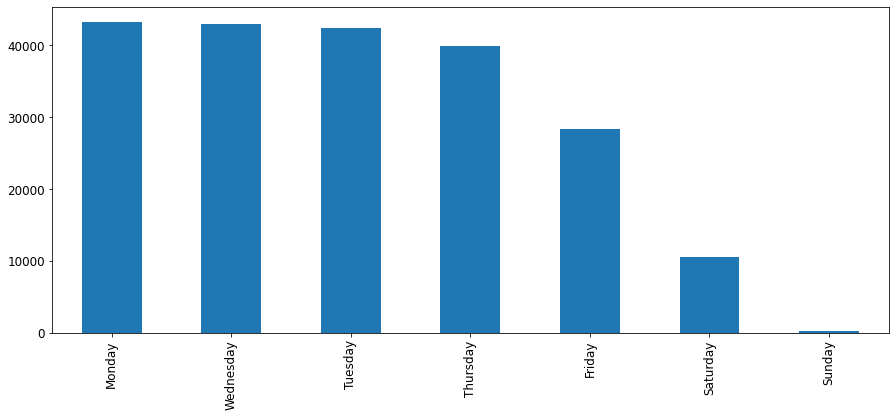

In [38]:
plt.figure(figsize=[15,6])
df.Weekday.value_counts().plot(kind='bar')
plt.show()

In [39]:
df.groupby('WardName')['Hour'].value_counts().sort_values(ascending=False)

WardName        Hour
other           7       31940
                15      27710
                6       11634
                16       9332
                13       8573
                        ...  
Gurappanapalya  9           1
Hudi            10          1
Jogupalya       16          1
Basavanapura    9           1
Halsoor         12          1
Name: Hour, Length: 280, dtype: int64

In [40]:
df.groupby('WardName')['AlarmType'].value_counts().sort_values(ascending=False)

WardName        AlarmType
other           UFCW         45950
                HMW          18940
                FCW          18907
                PCW          13472
                Overspeed    13450
                             ...  
J P Nagar       HMW              1
Singasandra     Overspeed        1
Sudham Nagara   HMW              1
Jayanagar East  HMW              1
Jogupalya       HMW              1
Name: AlarmType, Length: 247, dtype: int64